# CoverMyMeds Project
### Team Spruce 
### Xichen Kong

In [1]:
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.2f' % x)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold

In [2]:
# read in data
date_df = pd.read_csv('dim_date.csv')
claims_df = pd.read_csv('dim_claims.csv')
pa_df = pd.read_csv('dim_pa.csv')
bridge_df = pd.read_csv('bridge.csv')

In [3]:
date_df

,dim_date_id,date_val,calendar_year,calendar_month,calendar_day,day_of_week,is_weekday,is_workday,is_holiday
0,1,2017-01-01,2017,1,1,1,0,0,1
1,2,2017-01-02,2017,1,2,2,1,0,0
2,3,2017-01-03,2017,1,3,3,1,1,0
3,4,2017-01-04,2017,1,4,4,1,1,0
4,5,2017-01-05,2017,1,5,5,1,1,0
...,...,...,...,...,...,...,...,...,...
1515,1516,2021-02-24,2021,2,24,4,1,1,0
1516,1517,2021-02-25,2021,2,25,5,1,1,0
1517,1518,2021-02-26,2021,2,26,6,1,1,0
1518,1519,2021-02-27,2021,2,27,7,0,0,0


In [34]:
claims_df

,dim_claim_id,bin,drug,reject_code,pharmacy_claim_approved
0,1,417380,A,75.000,0
1,2,999001,A,NaN,1
2,3,417740,A,76.000,0
3,4,999001,A,NaN,1
4,5,417740,A,NaN,1
...,...,...,...,...,...
1335571,1335572,417740,C,75.000,0
1335572,1335573,999001,C,NaN,1
1335573,1335574,417380,C,70.000,0
1335574,1335575,999001,C,NaN,1


In [35]:
pa_df

,dim_pa_id,correct_diagnosis,tried_and_failed,contraindication,pa_approved
0,1,1,1,0,1
1,2,1,0,0,1
2,3,0,0,1,1
3,4,1,1,0,1
4,5,0,1,0,1
...,...,...,...,...,...
555946,555947,1,0,1,0
555947,555948,1,0,1,1
555948,555949,1,1,1,1
555949,555950,1,0,0,1


In [36]:
bridge_df

,dim_claim_id,dim_pa_id,dim_date_id
0,1,1.000,1
1,2,NaN,1
2,3,2.000,1
3,4,NaN,1
4,5,NaN,1
...,...,...,...
1335571,1335572,555950.000,1095
1335572,1335573,NaN,1095
1335573,1335574,555951.000,1095
1335574,1335575,NaN,1095


In [3]:
# merge date and pa info onto claims data
cb = pd.merge(claims_df, bridge_df, how = 'left', on=['dim_claim_id'])
cbd = pd.merge(cb, date_df, how = 'left', on=['dim_date_id'])
claim = pd.merge(cbd, pa_df, how = 'left', on=['dim_pa_id'])
claim.set_index('dim_claim_id', inplace=True)
claim

,bin,drug,reject_code,pharmacy_claim_approved,dim_pa_id,dim_date_id,date_val,calendar_year,calendar_month,calendar_day,day_of_week,is_weekday,is_workday,is_holiday,correct_diagnosis,tried_and_failed,contraindication,pa_approved
dim_claim_id,,,,,,,,,,,,,,,,,,
1,417380,A,75.00,0,1.00,1,2017-01-01,2017,1,1,1,0,0,1,1.00,1.00,0.00,1.00
2,999001,A,NaN,1,NaN,1,2017-01-01,2017,1,1,1,0,0,1,NaN,NaN,NaN,NaN
3,417740,A,76.00,0,2.00,1,2017-01-01,2017,1,1,1,0,0,1,1.00,0.00,0.00,1.00
4,999001,A,NaN,1,NaN,1,2017-01-01,2017,1,1,1,0,0,1,NaN,NaN,NaN,NaN
5,417740,A,NaN,1,NaN,1,2017-01-01,2017,1,1,1,0,0,1,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1335572,417740,C,75.00,0,555950.00,1095,2019-12-31,2019,12,31,3,1,1,0,1.00,0.00,0.00,1.00
1335573,999001,C,NaN,1,NaN,1095,2019-12-31,2019,12,31,3,1,1,0,NaN,NaN,NaN,NaN
1335574,417380,C,70.00,0,555951.00,1095,2019-12-31,2019,12,31,3,1,1,0,0.00,0.00,1.00,0.00


In [4]:
# rename payer IDs
claim['bin'] = claim['bin'].replace({417380:1,
                                    999001:2,
                                    417740:3,
                                    417614:4})
claim.to_csv('claim.csv')

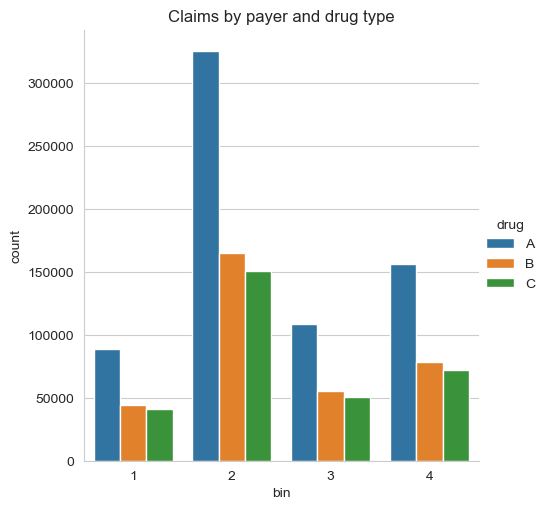

In [9]:
# claims by payer and drug type
sns.catplot(data=claim, kind='count', x='bin', hue='drug')
plt.title('Claims by payer and drug type')
plt.savefig('bindrug.pdf')

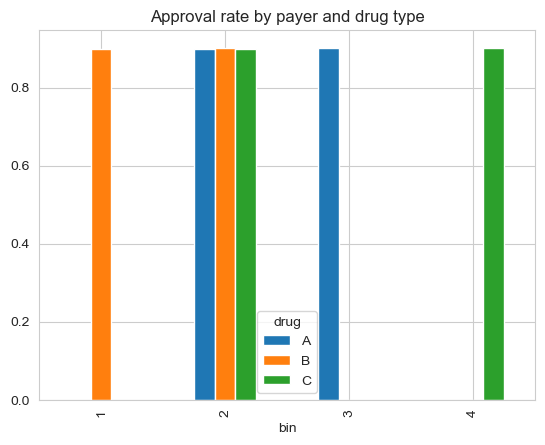

In [7]:
# approval rate by payer and drug type
claim_pivot = claim.pivot_table(index='bin', columns='drug', values='pharmacy_claim_approved', aggfunc=np.mean, fill_value=0)
claim_pivot.plot.bar()
plt.title('Approval rate by payer and drug type')
plt.savefig('approval.pdf')

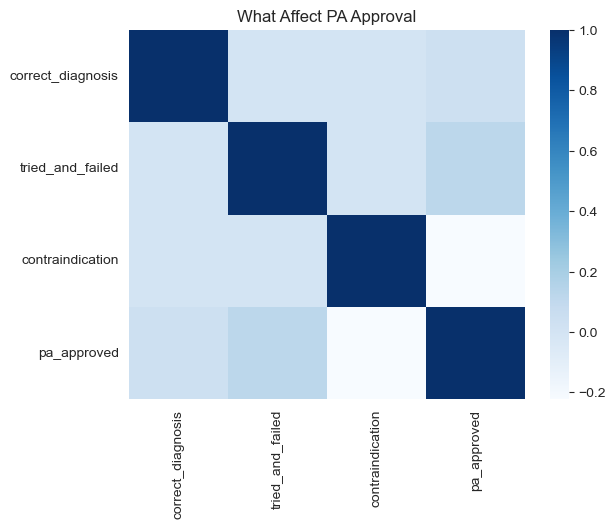

In [10]:
# What Affect PA Approval
corr = claim[['correct_diagnosis', 'tried_and_failed', 'contraindication','pa_approved']].corr()
sns.heatmap(corr, cmap="Blues")
plt.title('What Affect PA Approval')
plt.savefig('PAapproval.pdf')